# **ANSWERING QUESTION 3, 4**

---

## **IMPORT**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **ĐỌC DỮ LIỆU**

In [2]:
df = pd.read_csv('../Data/Time-Wasters on Social Media_Cleaned.csv')
df.head(5)

,Income,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Importance Score,Time Spent On Video,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Self Control,Addiction Level,CurrentActivity,Female,Male,Age Group
0,82812,Engineer,Instagram,80,17,Pranks,5,26,22,Night,3,7,Procrastination,5,5,Commuting,False,True,3
1,27999,Artist,Instagram,228,14,Pranks,6,25,31,Afternoon,5,5,Habit,7,3,At school,True,False,3
2,42436,Engineer,Facebook,30,6,Vlogs,3,9,7,Evening,6,4,Entertainment,8,2,At home,True,False,2
3,62963,Waiting staff,YouTube,101,19,Vlogs,2,6,41,Night,3,7,Habit,5,5,Commuting,False,True,4
4,22096,Manager,TikTok,136,6,Gaming,7,13,21,Morning,8,2,Boredom,10,0,At home,False,True,2


---

## **Câu 3: Sự khác biệt giữa các nhóm tuổi (Age Group) trong tần suất sử dụng nền tảng (Frequency) và mức độ nghiện (Addiction Level).**

### **3.1. Tiền xử lý**

- **Bước 1**: Ánh xạ dữ liệu trong cột `Frequency` từ khung thời gian ("*Morning*", "*Afteroon*", "*Evening*", "(Night)") thành những giá trị số tương ứng (1, 2, 3, 4) để thực hiện các phép toán: tính trung bình (*Mean*) và độ lệch (*Std*).

- **Bước 2**: Gom nhóm Dataframe theo `Age Group`, tạo một Dataframe mới **age_grouped** chứa dữ liệu về các giá trị trung bình và độ lệch chuẩn của `Frequency` và `Addiction Level` ("*Frequency Mean*", "*Frequency Std*", "*Addiction Level Mean*", "*Addiction Level Std").*

In [3]:
# Ánh xạ cột Frequency
frequency_mapping = {
    "Morning": 1,
    "Afternoon": 2,
    "Evening": 3,
    "Night": 4
}

df['Frequency Encoded'] = df['Frequency'].map(frequency_mapping)
df.head(5)

,Income,Profession,Platform,Total Time Spent,Number of Sessions,Video Category,Importance Score,Time Spent On Video,Number of Videos Watched,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Self Control,Addiction Level,CurrentActivity,Female,Male,Age Group,Frequency Encoded
0,82812,Engineer,Instagram,80,17,Pranks,5,26,22,Night,3,7,Procrastination,5,5,Commuting,False,True,3,4
1,27999,Artist,Instagram,228,14,Pranks,6,25,31,Afternoon,5,5,Habit,7,3,At school,True,False,3,2
2,42436,Engineer,Facebook,30,6,Vlogs,3,9,7,Evening,6,4,Entertainment,8,2,At home,True,False,2,3
3,62963,Waiting staff,YouTube,101,19,Vlogs,2,6,41,Night,3,7,Habit,5,5,Commuting,False,True,4,4
4,22096,Manager,TikTok,136,6,Gaming,7,13,21,Morning,8,2,Boredom,10,0,At home,False,True,2,1


In [4]:
age_grouped = df.groupby('Age Group').agg({
    "Frequency Encoded": ["mean", "std"],
    "Addiction Level": ["mean", "std"]
}).reset_index()

age_grouped.columns = ["Age Group", "Frequency Mean", "Frequency Std", "Addiction Level Mean", "Addiction Level Std"]
age_grouped

,Age Group,Frequency Mean,Frequency Std,Addiction Level Mean,Addiction Level Std
0,1,2.883117,0.899877,2.649351,1.985347
1,2,2.860577,0.981655,2.966346,2.021290
2,3,2.824242,0.989007,2.827273,2.048911
3,4,3.050000,0.936089,3.310000,2.299297


### **3.2. Trực quan hóa dữ liệu**

- Vẽ 2 biểu đồ **Bar Plot** thể hiện giá trị trung bình của tần suất sử dụng nền tảng và mức độ nghiện theo từng nhóm tuổi.

- Với mỗi **Bar Plot**, thêm đường **errorbar** biểu diễn độ lệch chuẩn trên các cột để cho thấy sự biến động theo từng nhóm tuổi khác nhau.

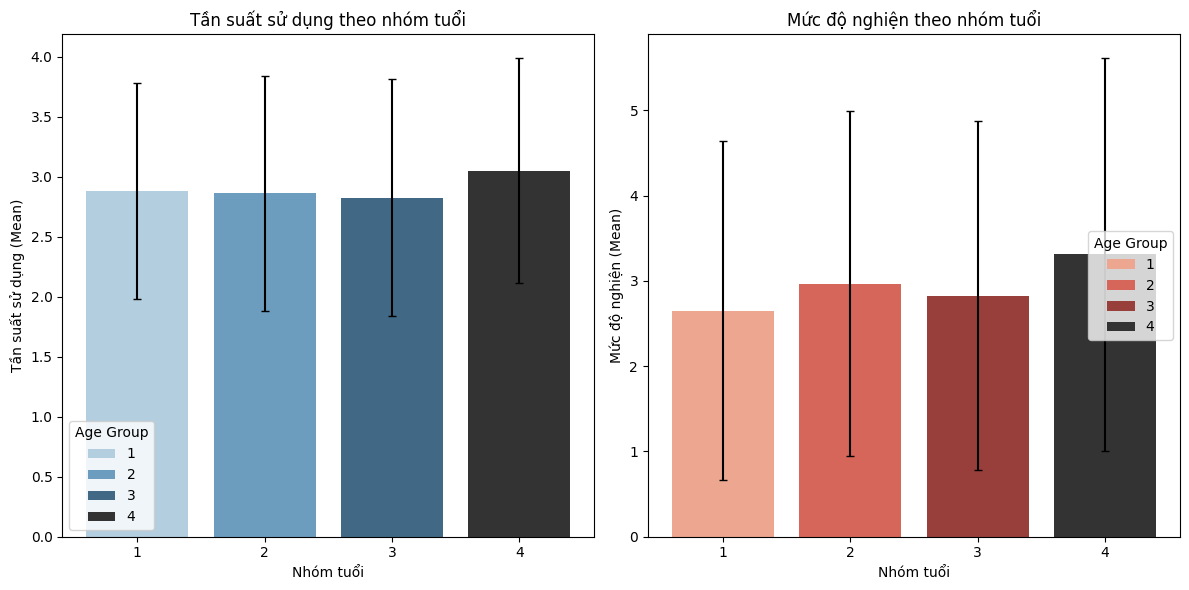

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ tần suất sử dụng
sns.barplot(
    data=age_grouped, x="Age Group", y="Frequency Mean", hue="Age Group", ax=ax[0],
    palette="Blues_d", dodge=False, capsize=0.2
)
ax[0].errorbar(
    x=np.arange(len(age_grouped)), y=age_grouped["Frequency Mean"],
    yerr=age_grouped["Frequency Std"], fmt="none", color="black", capsize=3
)
ax[0].set_title("Tần suất sử dụng theo nhóm tuổi")
ax[0].set_xlabel("Nhóm tuổi")
ax[0].set_ylabel("Tần suất sử dụng (Mean)")

# Biểu đồ mức độ nghiện
sns.barplot(
    data=age_grouped, x="Age Group", y="Addiction Level Mean", hue="Age Group", ax=ax[1],
    palette="Reds_d", dodge=False, capsize=0.2
)
ax[1].errorbar(
    x=np.arange(len(age_grouped)), y=age_grouped["Addiction Level Mean"],
    yerr=age_grouped["Addiction Level Std"], fmt="none", color="black", capsize=3
)
ax[1].set_title("Mức độ nghiện theo nhóm tuổi")
ax[1].set_xlabel("Nhóm tuổi")
ax[1].set_ylabel("Mức độ nghiện (Mean)")

plt.tight_layout()
plt.show()

### **3.3. Nhận xét**

**Tần suất sử dụng (Frequency)**:

- **Nhóm tuổi 1, 2, 3 và 4** có giá trị trung bình tần suất sử dụng nền tảng tương đối **tương đương nhau** (dao động từ 2.8 đến 3.0). Điều này cho thấy **không có sự khác biệt rõ ràng về tần suất sử dụng** giữa các nhóm tuổi.

**Mức độ nghiện (Addiction Level)**:

- **Nhóm tuổi 4** (cao tuổi nhất) có mức độ nghiện trung bình cao nhất, trong khi các nhóm tuổi còn lại (1, 2, 3) có mức độ nghiện trung bình khá tương đồng (khoảng từ 2.5 đến 3.0).

- Khoảng dao động (error bar) của nhóm tuổi 4 lớn hơn các nhóm khác, cho thấy mức độ nghiện của nhóm này có sự biến động nhiều hơn so với các nhóm trẻ.

**Kết luận**:

- **Tần suất sử dụng nền tảng** không có sự khác biệt đáng kể giữa các nhóm tuổi.

- **Mức độ nghiện** có xu hướng cao hơn ở nhóm tuổi 4 (cao tuổi), nhưng khoảng dao động lớn làm giảm độ chắc chắn của xu hướng này.

## **Câu 4: Lý do xem video (Watch Reason) khác nhau như thế nào giữa các nhóm tuổi trong cùng một giới tính?**

### **4.1. Tiền xử lý**

- **Bước 1**: Lọc dữ liệu trong Dataframe theo giới tính và lưu trữ vào 2 Dataframe con (**female_data** và **male_data**).

- **Bước 2**: Nhóm 2 Dataframe trên theo `Age Group` và `Watch Reason`, tính phần trăm tỷ lệ của từng lý do ("*Boredom*", "*Entertainment*", "*Habit*", "*Procrastination*") theo nhóm tuổi và lưu vào **female_groupes**, **male_grouped** tương ứng cho *Female* và *Male*.

In [6]:
# Lọc dữ liệu theo giới tính
female_data = df[df['Female']]
male_data = df[df['Male']]

In [7]:
# Tính toán lý do xem video theo nhóm tuổi cho Female
female_grouped = (
    female_data.groupby(['Age Group', 'Watch Reason'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)  # Tính phần trăm
)
female_grouped

Watch Reason,Boredom,Entertainment,Habit,Procrastination
Age Group,,,,
1,0.250000,0.229167,0.416667,0.104167
2,0.287671,0.267123,0.363014,0.082192
3,0.258065,0.268817,0.387097,0.086022
4,0.342857,0.257143,0.285714,0.114286


In [8]:
# Tính toán lý do xem video theo nhóm tuổi cho Male
male_grouped = (
    male_data.groupby(['Age Group', 'Watch Reason'])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)
male_grouped

Watch Reason,Boredom,Entertainment,Habit,Procrastination
Age Group,,,,
1,0.312500,0.250000,0.312500,0.125000
2,0.292683,0.273171,0.292683,0.141463
3,0.256983,0.251397,0.351955,0.139665
4,0.180000,0.280000,0.300000,0.240000


### **4.2. Trực quan hóa dữ liệu**

- Vẽ 2 biểu đồ cột chồng (*stacked bar chart*) tương ứng với 2 giới tính (*Female* và *Male*).

- Mỗi biểu đồ biểu diễn tỷ lệ phần trăm của từng lý do xem theo 4 nhóm tuổi (*18 - 24*, *25 - 44*, *45 - 59*, *60+*).

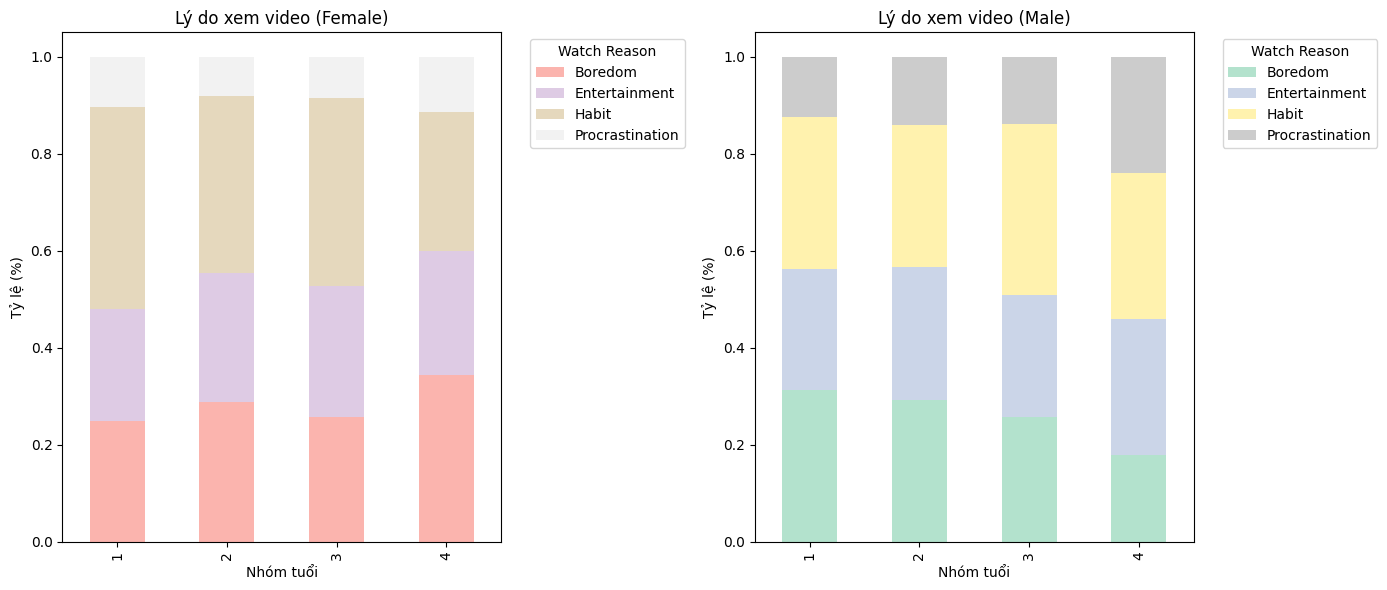

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ biểu đồ Female
female_grouped.plot(
    kind="bar", stacked=True, colormap="Pastel1", ax=ax[0]
)
ax[0].set_title("Lý do xem video (Female)")
ax[0].set_xlabel("Nhóm tuổi")
ax[0].set_ylabel("Tỷ lệ (%)")
ax[0].legend(title="Watch Reason", bbox_to_anchor=(1.05, 1), loc="upper left")

# Vẽ biểu đồ Male
male_grouped.plot(
    kind="bar", stacked=True, colormap="Pastel2", ax=ax[1]
)
ax[1].set_title("Lý do xem video (Male)")
ax[1].set_xlabel("Nhóm tuổi")
ax[1].set_ylabel("Tỷ lệ (%)")
ax[1].legend(title="Watch Reason", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

### **4.3. Nhận xét**

**Theo nhóm tuổi**

- **Người trẻ (18-24)**: Lý do chủ yếu là *Entertainment* và *Boredom* do tính chất giải trí và linh hoạt.

- **Người trưởng thành (25-44)**: Tăng mạnh ở *Procrastination*, do áp lực công việc và cuộc sống.

- **Trung niên (45-59)** và **người già (60+)**: Chủ yếu xem video do *Habit*, phù hợp với lối sống ổn định và nhiều thời gian rảnh.

**Nữ giới (Female)**:

- **Thói quen (Habit)**: Lý do chính ở mọi nhóm tuổi, đặc biệt nhóm già (60+), phản ánh thói quen xem video cố định hàng ngày.

- **Giải trí (Entertainment)**: Phổ biến ở nhóm trẻ (18-24) và trưởng thành (25-44), phù hợp với nhu cầu thư giãn trong lối sống năng động.

- **Chán nản (Boredom)** và **Trì hoãn (Procrastination)**: Tỷ lệ thấp hơn, giảm mạnh ở nhóm trung niên (45-59) và già (60+), do ít bị ảnh hưởng bởi áp lực công việc hoặc cảm giác chán nản.

**Nam giới (Male)**:

- **Thói quen (Habit)**: Lý do chủ đạo, giống nữ giới, phản ánh tính ổn định trong thói quen xem video.

- **Chán nản (Boredom)**: Nổi bật ở nhóm trẻ (18-24), cho thấy nam giới trẻ thường dùng video để giết thời gian.

- **Trì hoãn (Procrastination)**: Cao hơn nữ, đặc biệt ở nhóm trưởng thành (25-44) và trung niên (45-59), có thể liên quan đến việc tránh áp lực công việc.

**Nhận xét**

- Lý do xem video thay đổi rõ rệt giữa các nhóm tuổi và giới tính, phản ánh những khác biệt về nhu cầu tâm lý và lối sống. **Người trẻ** thường xem video để giải trí hoặc giết thời gian, trong khi **người già** lại xem như một thói quen thường nhật. **Nam giới** có xu hướng sử dụng video như cách trì hoãn công việc hơn **nữ giới**, thể hiện sự khác biệt về cách đối phó với áp lực.

- Những xu hướng này cho thấy việc cá nhân hóa nội dung video dựa trên độ tuổi và giới tính có thể giúp các nền tảng tăng mức độ tương tác và sự hài lòng từ người dùng.